<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week13_2_%EA%B5%B0%EC%A7%91%ED%99%94_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 p463-487

###05. DBSCAN
: 밀도 기반 군집화 알고리즘
- 복잡한 기하학적 분포의 데이터 세트에 대해 군집화 잘 수행
- 파라미터
  - 입실론 주변 영역(epsilon): 개별 데이터 중심으로 입실론 반경을 갖는 원형 영역 => eps
  - 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수 => min_samples (min points+1)
  
    -> 핵심 포인트 : 최소 데이터 개수 이상의 타 데이터 가진 경우 해당하는 데이터

    -> 이웃 포인트 : 주변 영역 내에 위치한 타 데이터

    -> 경계 포인트 : 최소 데이터 개수 이상의 이웃포인트 갖고 있지 않지만 핵심포인트를 이웃포인트로 가짐

    -> 잡음 포인트 : 경계포인트 + 핵심데이터도 이웃으로 갖지 않음

In [1]:
from sklearn.datasets import load_iris

import pandas as pd


# Load the iris dataset

iris = load_iris()



# Create a DataFrame for iris data

irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [2]:
from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels= dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster']= dbscan_labels
irisDF['target']= iris.target

iris_result= irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


- -1 로 군집화된 것은 노이즈

In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.datasets import make_blobs


%matplotlib inline


def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):

    if dataframe is None:

        print("Error: DataFrame is required.")

        return

    unique_labels = np.unique(dataframe[label_name])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']


    for label in unique_labels:

        label_cluster = dataframe[dataframe[label_name] == label]

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',

                    marker=markers[label % len(markers)])


        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):

            # Assuming cluster_result has a .cluster_centers_ attribute

            center_x_y = cluster_result.cluster_centers_[label]

            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,

                        marker=markers[label % len(markers)])

            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',

                        marker='$%d$' % label)

    plt.show()

- 군집화 데이터 세트를 2차원 평면에서 표현 -> pca, 시각화

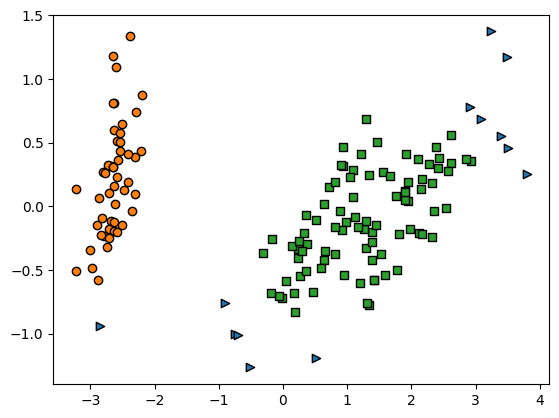

In [4]:
from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환

pca= PCA(n_components=2, random_state=0)
pca_transformed= pca.fit_transform(iris.data)

# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']= pca_transformed[:,0]
irisDF['ftr2']= pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- eps를 증가시키면 노이즈 데이터 수 감소

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


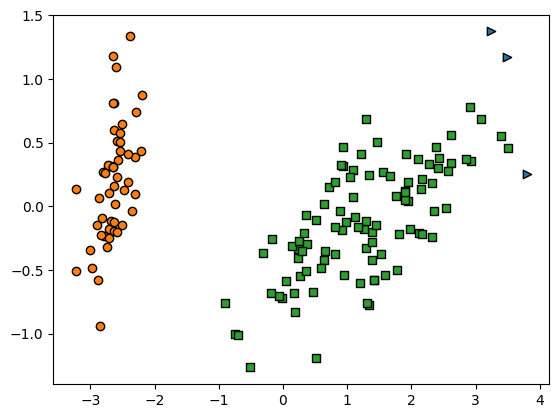

In [7]:
from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps= 0.8, min_samples=8, metric='euclidean')
dbscan_labels= dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']= dbscan_labels
irisDF['target']= iris.target

iris_result= irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- eps 0.6 유지, min_samples 16으로 증가

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


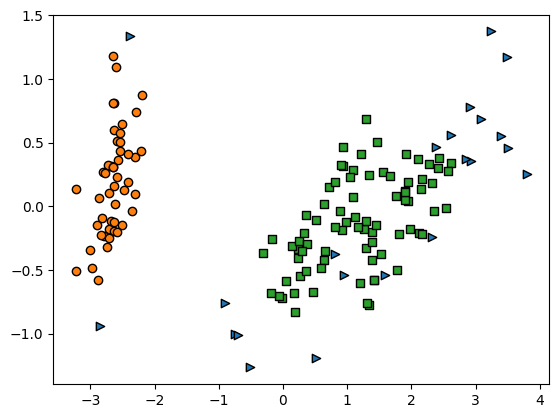

In [9]:
dbscan= DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

dbscan_labels= dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']= dbscan_labels
irisDF['target']= iris.target

iris_result= irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**make_circles() 함수**
- 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트 만들기
- noise : 노이즈 데이터 세트의 비율
- factor : 외부 원과 내부 원의 scale 비율

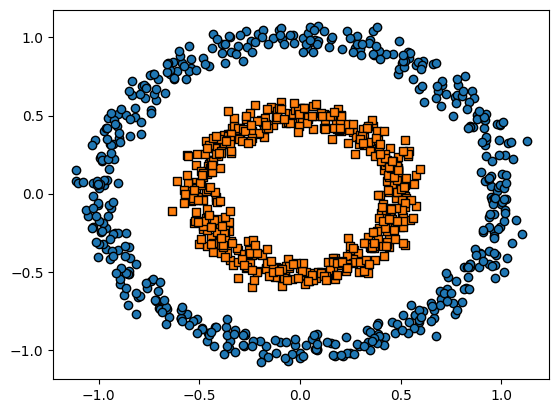

In [10]:
from sklearn.datasets import make_circles

X,y= make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF= pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

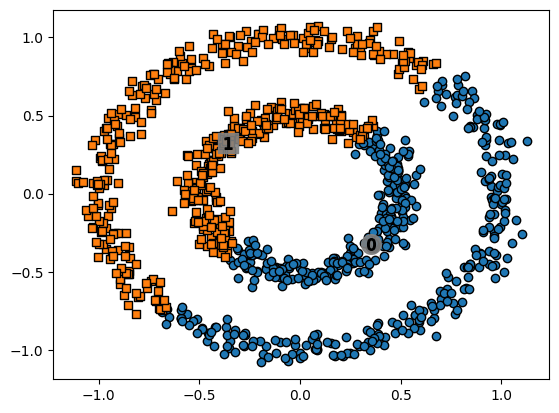

In [11]:
#KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels= kmeans.fit_predict(X)
clusterDF['kmeans_cluster']= kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

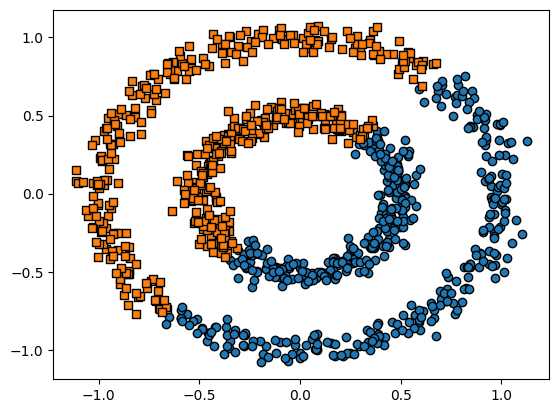

In [12]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm= GaussianMixture(n_components=2, random_state=0)
gmm_label= gmm.fit(X).predict(X)
clusterDF['gmm_cluster']= gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- GMM 은 일렬로 늘어선 데이터 세트에 대해 효과적으로 군집화 적용 가능 .. 원형 데이터는 X

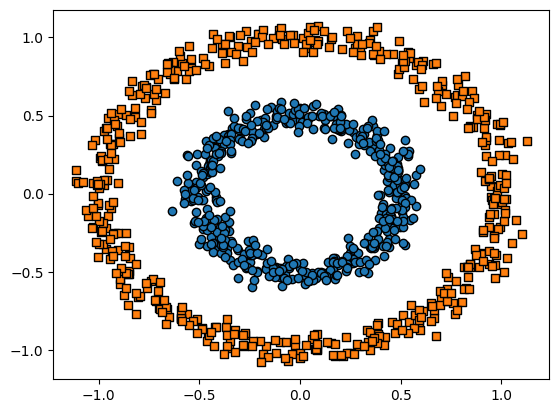

In [13]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels= dbscan.fit_predict(X)
clusterDF['dbscan_cluster']= dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

###06.군집화 실습- 고객 세그먼테이션
- 고객 세그먼테이션 : 고객 분류 기법, CRM이나 마케팅의 중요 기반 요소
- 목표 : 타깃 마케팅
- RFM 기법
  - Recency(R) 가장 최근 상품 구입 일에서 오늘까지의 기간
  - Frequency(F) 상품 구매 횟수  
  - Monetary Value(M) 총 구매 금액

In [14]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df= pd.read_excel(io= '/content/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


■ InvoiceNo： 주문번호 ‘C’로 시작하는 것은 취소 주문입니다.

■ StockCode： 제품 코드（Item Code）

■ Description： 제품 설명

■ Quantity： 주문 제품 건수

■ InvoiceDate： 주문 일자

■ UnitPrice： 제품 단가

■ CustomerlD： 고객 번호

■ Country： 국가명（주문고객의국적）

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Null 데이터 제거: CustomerID가 많으므로 삭제
- 오류 데이터 삭제 : Quantity, UnitPrice < 0 인 경우 -> 삭제

In [16]:
retail_df= retail_df[retail_df['Quantity']>0]
retail_df= retail_df[retail_df['UnitPrice']>0]
retail_df= retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [17]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [18]:
retail_df= retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


**RFM 기반 데이터 가공**
- 주문 금액 데이터 만들기
- 고객 번호 int형으로 변경

In [23]:
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']= retail_df['CustomerID'].astype(int)
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False).iloc[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [24]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

- 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 분류 수행
- 주문번호+상품코드 -> Recency, Frequency, Monetary value 데이터변경
- groupdy('CustomerID') 적용, agg() 이용-> 여러 aggregation 연산 수행 가능

In [25]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount칼럼의 sum()

aggregations={
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
cust_df= retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df= cust_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'sale_amount': 'Monetary'
})
cust_df= cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


- Recency 칼럼은 개별 고객당 가장 최근 주문 -> 오늘 날짜 기준으로 가장 최근 주문 일자 뺌
- 12/1-12/9 데이터이므로 오늘= 12/10으로 간주

In [26]:
import datetime as dt
cust_df['Recency']= dt.datetime(2011, 12, 10)- cust_df['Recency']
cust_df['Recency']= cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


- 왜곡된 데이터 분포도에서 군집화 수행 시 발생 현상 알아보기

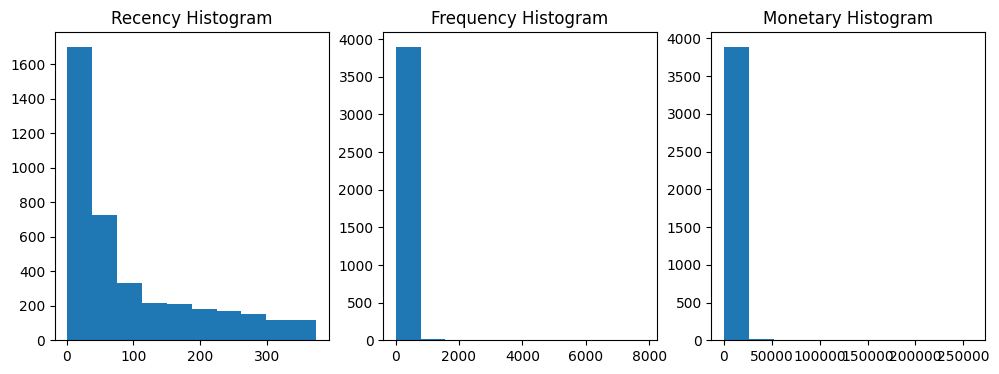

In [27]:
fig, (ax1, ax2, ax3)= plt.subplots(figsize=(12, 4), nrows=1,ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

plt.show()

In [28]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [29]:
# 정규화 -> K-평균 수행
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features= cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled= StandardScaler().fit_transform(X_features)

kmeans= KMeans(n_clusters=3, random_state=0)
labels= kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']= labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.576


In [33]:
import matplotlib.pyplot as plt

import matplotlib.cm as cm

import numpy as np

import pandas as pd

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.decomposition import PCA


def visualize_silhouette(cluster_lists, X_features):

    # Visualize Silhouette for each cluster_lists

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)


    for ind, n_cluster in enumerate(cluster_lists):

        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')

        cluster_labels = kmeans.fit_predict(X_features)


        silhouette_avg = silhouette_score(X_features, cluster_labels)

        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)


        y_lower = 10

        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \

                           'Silhouette Score :' + str(round(silhouette_avg, 3)))

        axs[ind].set_xlabel("The silhouette coefficient values")

        axs[ind].set_ylabel("Cluster label")

        axs[ind].set_xlim([-0.1, 1])

        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])

        axs[ind].set_yticks([])

        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])


        for i in range(n_cluster):

            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()


            size_cluster_i = ith_cluster_silhouette_values.shape[0]

            y_upper = y_lower + size_cluster_i


            color = cm.nipy_spectral(float(i) / n_cluster)

            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, \

                                   facecolor=color, edgecolor=color, alpha=0.7)

            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10


        axs[ind].axvline(x=silhouette_avg, color="red", linestyle="--")


    plt.tight_layout()

    plt.show()


def visualize_kmeans_plot_multi(cluster_lists, X_features, iscenter=False):

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)


    pca = PCA(n_components=2, random_state=0)

    pca_transformed = pca.fit_transform(X_features)


    dataframe = pd.DataFrame(data=pca_transformed, columns=['ftr1', 'ftr2'])


    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']


    for ind, n_cluster in enumerate(cluster_lists):

        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')

        cluster_labels = kmeans.fit_predict(X_features)

        dataframe['cluster'] = cluster_labels


        unique_labels = np.unique(dataframe['cluster'])


        for label in unique_labels:

            label_cluster = dataframe[dataframe['cluster'] == label]

            axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',

                             marker=markers[label % len(markers)])


        if iscenter and hasattr(kmeans, 'cluster_centers_'):

            center_x_y = pca.transform(kmeans.cluster_centers_)

            for label, center in enumerate(center_x_y):

                axs[ind].scatter(x=center[0], y=center[1], s=200, color='gray', alpha=0.9,

                                 marker=markers[label % len(markers)])

                axs[ind].scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k',

                                 marker='$%d$' % label)

        axs[ind].set_title('Number of Cluster : ' + str(n_cluster))

        axs[ind].set_xlabel('ftr1')

        axs[ind].set_ylabel('ftr2')

    plt.tight_layout()

    plt.show()


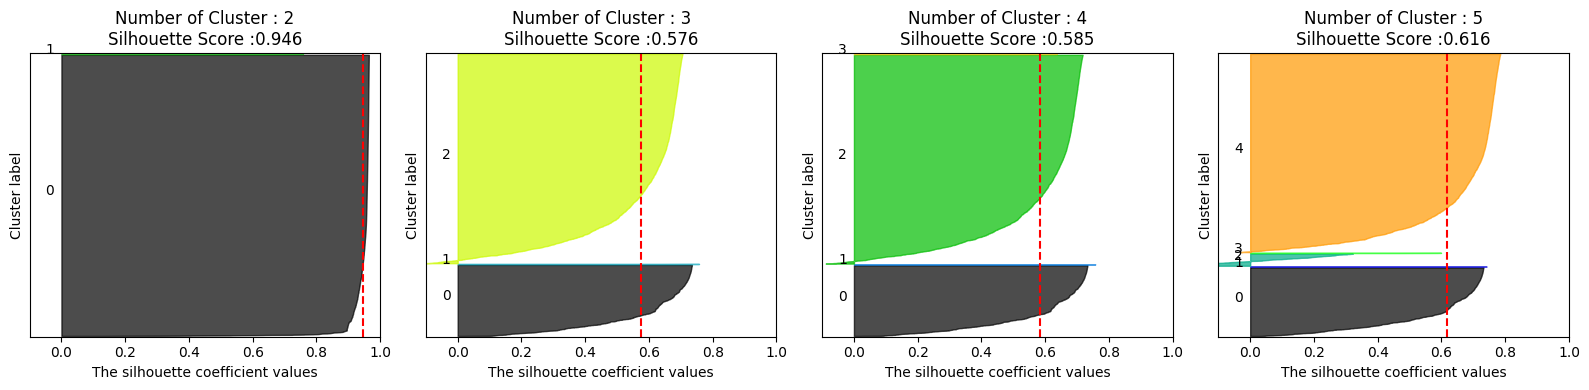

/tmp/ipython-input-341386713.py:121: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
/tmp/ipython-input-341386713.py:121: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',


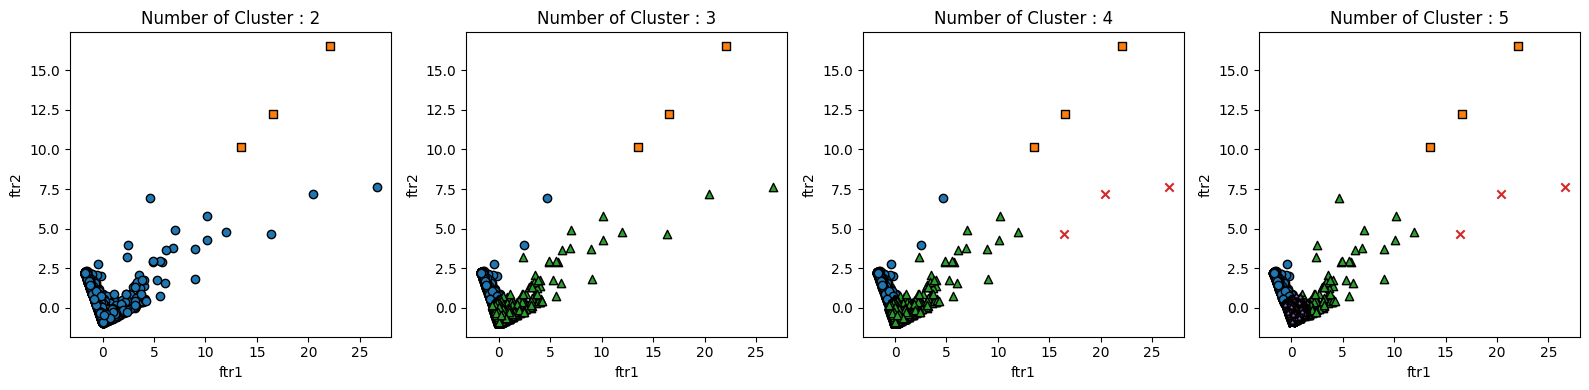

In [34]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

- 군집이 3개이상일때부터 실루엣 계수 작고 데이터가 광범위하게 퍼져있음
- 데이터 값이 거리 기반으로 광범위하게 퍼져있음

-> 로그 변환하여 왜곡 정도 낮추자

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 log Transformation
cust_df['Recency_log']= np.log1p(cust_df['Recency'])
cust_df['Frequency_log']= np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']= np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler적용
X_features= cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled= StandardScaler().fit_transform(X_features)

kmeans= KMeans(n_clusters=3, random_state=0)
labels= kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']= labels
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))


실루엣 스코어는 : 0.303


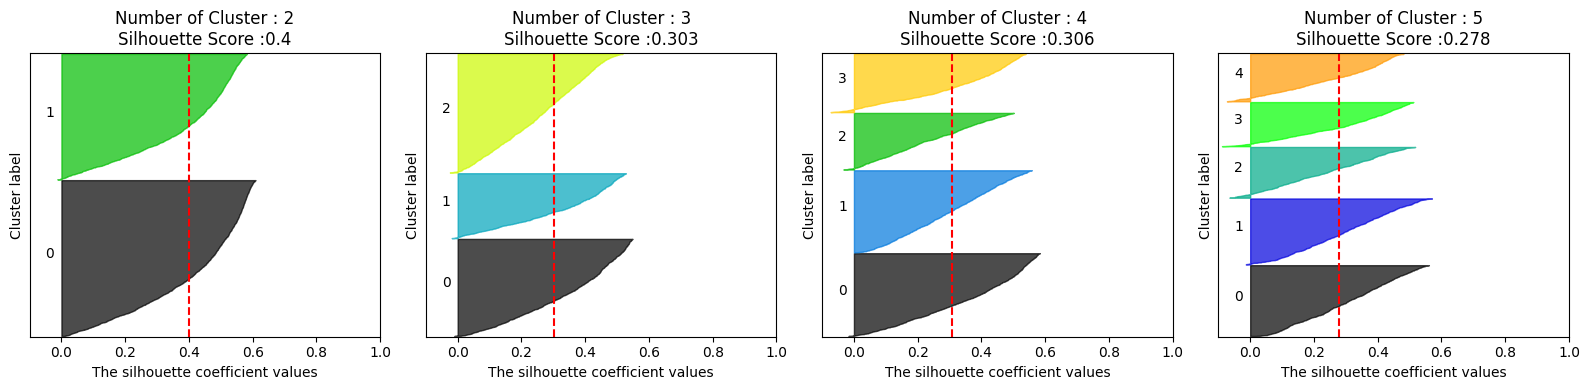

/tmp/ipython-input-341386713.py:121: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
/tmp/ipython-input-341386713.py:121: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',


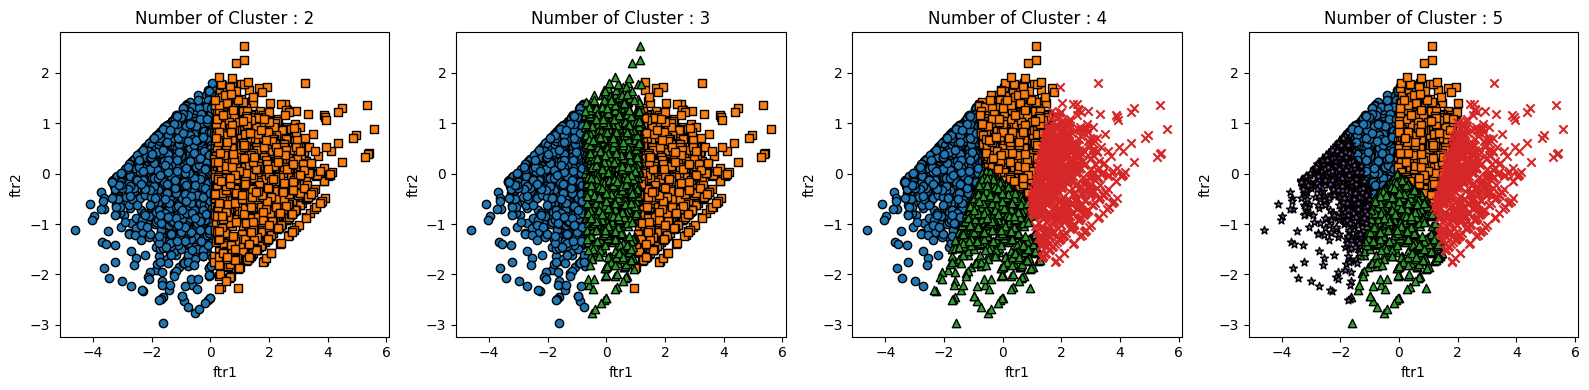

In [36]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

**정리**
1. k-평균 : 거리 기반으로 군집화, 실루엣 계수 이용
2. 평균 이동(Mean Shift) : 데이터가 모여있는 밀도가 높은 쪽으로 중심점 이동하면서 군집화 수행 -> 컴퓨터 비전 영역에서 움직임 추적이나 개체 구분
3. GMM : 군집화 적용 데이터가 여러 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행, 유연하게 다양한 데이터 세트에 적용됨
4. DBSCAN : 밀도 기반 군집화, 기하학적으로 복잡한 데이터 세트에도 효과적